# Emergency calls dataset
 [Emergency - 911 Calls from Montgomery County, PA](https://www.kaggle.com/mchirico/montcoalert)

* `lat` : Latitude  
* `lng`: Longitude
* `desc`: Description of the Emergency Call
* `zip`: Zipcode
* `title`: Title
* `timeStamp`: YYYY-MM-DD HH:MM:SS
* `twp`: Township
* `addr`: Address
* `e`: always 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
df = pd.read_csv('Emergency_Calls.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
df['twp'].nunique(), df['title'].nunique()

(68, 110)

In [6]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [7]:
print('There are {} nnique title codes in the dataset'.format(df['title'].nunique()))
print(df['title'].value_counts().head())

There are 110 nnique title codes in the dataset
Traffic: VEHICLE ACCIDENT -    23066
Traffic: DISABLED VEHICLE -     7702
Fire: FIRE ALARM                5496
EMS: RESPIRATORY EMERGENCY      5112
EMS: CARDIAC EMERGENCY          5012
Name: title, dtype: int64


In [8]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])
df['Code'] = df['title'].apply(lambda title: title.split(':')[1])

In [9]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Code
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY


In [10]:
df['Reason'].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

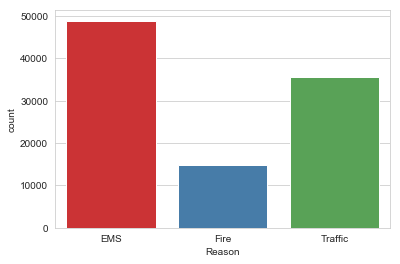

In [11]:
sns.countplot(x='Reason',data=df, palette='Set1');

In [12]:
df['timeStamp'].iloc[0], type(df['timeStamp'].iloc[0])

('2015-12-10 17:40:00', str)

In [13]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [14]:
time=df['timeStamp'].iloc[0]
type(time), time,  time.month, time.year

(pandas._libs.tslibs.timestamps.Timestamp,
 Timestamp('2015-12-10 17:40:00'),
 12,
 2015)

In [15]:
df['year'] = df['timeStamp'].apply(lambda time: time.year)
df['hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['month'] = df['timeStamp'].apply(lambda time: time.month)
df['date'] = df['timeStamp'].apply(lambda time: time.date())
df['week_day'] = df['timeStamp'].apply(lambda time: time.dayofweek)
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Code,year,hour,month,date,week_day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,2015,17,12,2015-12-10,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,2015,17,12,2015-12-10,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK,2015,17,12,2015-12-10,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY,2015,17,12,2015-12-10,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS,2015,17,12,2015-12-10,3


In [16]:
day_map = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
month_map = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 
             7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'} 

In [17]:
df['day_name'] = df['week_day'].map(day_map)
df['month_name'] = df['month'].map(month_map)
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Code,year,hour,month,date,week_day,day_name,month_name
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,2015,17,12,2015-12-10,3,Thu,Dec
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,2015,17,12,2015-12-10,3,Thu,Dec
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK,2015,17,12,2015-12-10,3,Thu,Dec
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY,2015,17,12,2015-12-10,3,Thu,Dec
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS,2015,17,12,2015-12-10,3,Thu,Dec


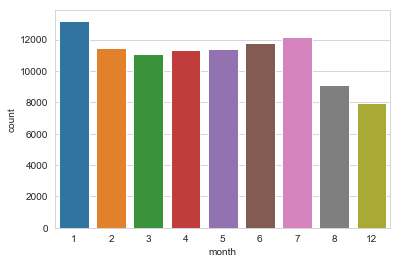

In [18]:
sns.countplot(x='month',data=df);
# few months are missing, sep, oct, nov.. will discuss soon

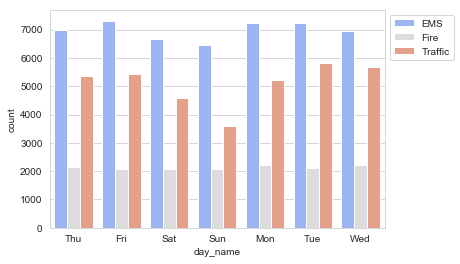

In [19]:
sns.countplot(x='day_name',data=df,hue='Reason',palette='coolwarm')
plt.legend(bbox_to_anchor=(1,1), loc=2);

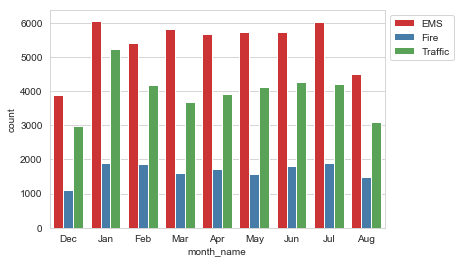

In [20]:
sns.countplot(x='month_name',data=df,hue='Reason',palette='Set1')
plt.legend(bbox_to_anchor=(1, 1), loc=2);

In [21]:
df['month_name'].isnull().sum()

0

In [22]:
byMonth = df.groupby('month').count()
byMonth.head(12)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Code,year,hour,date,week_day,day_name,month_name
month,,,,,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969,7969,7969,7969,7969


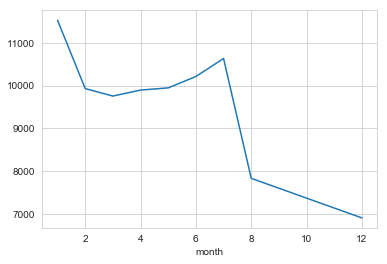

In [23]:
# Could be any column
byMonth['zip'].plot();

In [24]:
data=byMonth.reset_index()
data.head()

,month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Code,year,hour,date,week_day,day_name,month_name
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423,11423,11423,11423


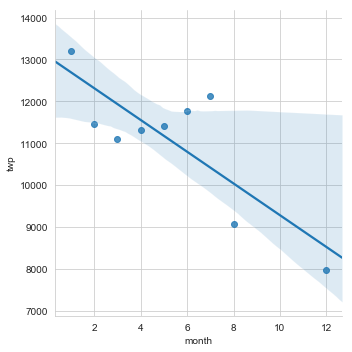

In [25]:
sns.lmplot(x='month',y='twp',data=data);

In [26]:
# Group data  based on three conditions Traffic, Fire, EMS
n_calls_byDate_Traffic = df[df['Reason']=='Traffic'].groupby('date').count()#['twp'].plot()
n_calls_byData_Fire = df[df['Reason']=='Fire'].groupby('date').count()
n_calls_byDate_EMS = df[df['Reason']=='EMS'].groupby('date').count()

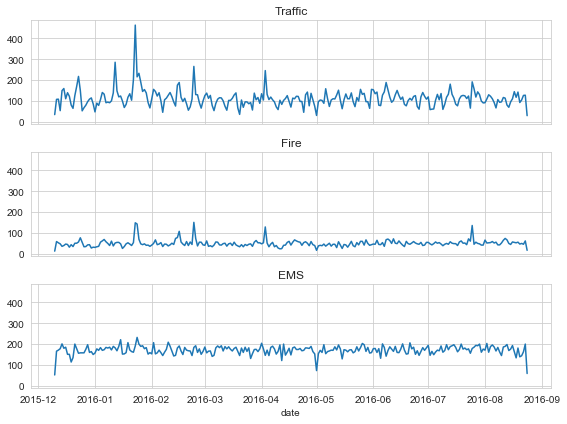

In [27]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, figsize=(8, 6), sharex=True,sharey=True)

n_calls_byDate_Traffic['zip'].plot(ax=ax1)
ax1.set_title('Traffic')

n_calls_byData_Fire['zip'].plot(ax=ax2)
ax2.set_title('Fire')

n_calls_byDate_EMS['zip'].plot(ax=ax3)
ax3.set_title('EMS')

plt.tight_layout()

In [28]:
by_dayhr=df.groupby(by=['day_name','hour']).count()['Reason'].unstack()
by_dayhr.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_name,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


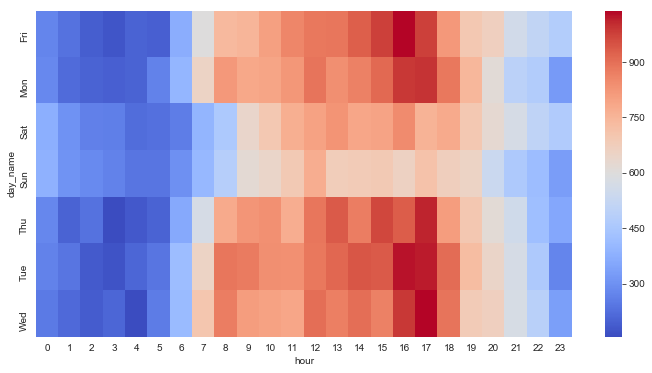

In [29]:
plt.figure(figsize=(12,6))
sns.heatmap(by_dayhr,cmap='coolwarm');

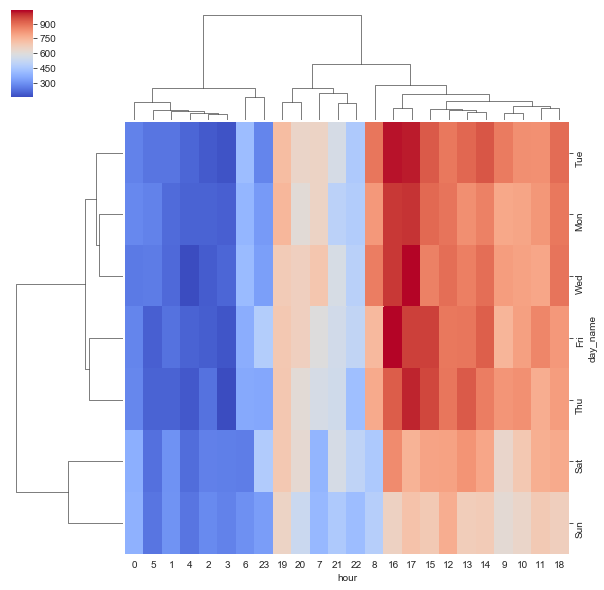

In [30]:
sns.clustermap(by_dayhr,cmap='coolwarm');

In [31]:
by_dayMonth = df.groupby(by=['day_name','month']).count()['Reason'].unstack()
by_dayMonth.head()

month,1,2,3,4,5,6,7,8,12
day_name,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


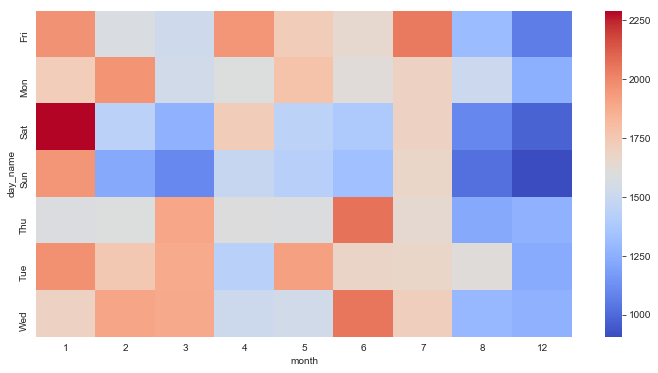

In [32]:
plt.figure(figsize=(12,6))
sns.heatmap(by_dayMonth,cmap='coolwarm');

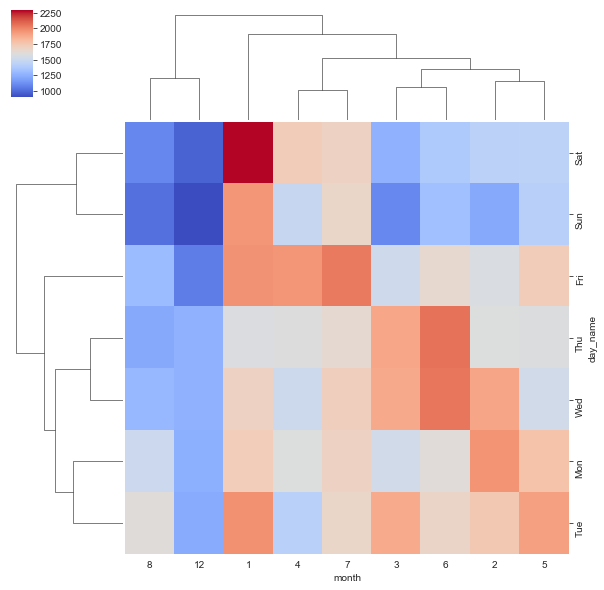

In [33]:
sns.clustermap(by_dayMonth,cmap='coolwarm');